# Exercícios - Cap 02

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from math import *
from IPython.display import Image
from IPython.core.display import HTML 
plt.style.use('ggplot')

np.random.seed(1)

## Exercício 01

In [2]:
Image(url= "ex01.png")

In [3]:
Image(url= "ex01-b.png")

O que acontece é que as retas do primeiro sistema são mais próximas de serem coincidentes do que do segundo sistema como os coeficientes angulares.

Sistema 1:

$u_1 -  u_2 = -1 \rightarrow u_2 = u_1 + 1$

$21u_1 - 20 u_2 = -19 \rightarrow u_2 = \frac{21}{20}u_1 + \frac{19}{20}$
    
Sistema 2:

$u_1 - u_2 = -1 \rightarrow u_2 = u_1 + 1$

$3u_1 - u_2 = 1 \rightarrow u_2 = 3u_1 - 1$

 
Abaixo são apresentados os gráficos das retas.

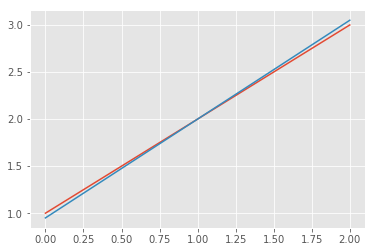

In [4]:
x=np.linspace(0, 2, endpoint=True, num=50)
y1 = 1 + x
y2 = (1.0/20)*(21*x+19)

plt.plot(x, y1)
plt.plot(x,y2)

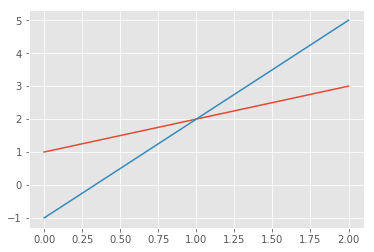

In [5]:
x=np.linspace(0, 2, endpoint=True, num=50)
y1 = 1.0 + x
y2 = -1.0+3*x

plt.plot(x, y1)
plt.plot(x,y2)

In [6]:
Image(url= "ex02.png")

$ r = b - Ax $

$ e = x^* - x \rightarrow x = x^* - e$

Substituindo $x$ na primeira equação.

$ r = b - A (x^* - e) $

$ r = b - A x^* + Ae $

Mas como $ Ax^* = b $

$ r = b - b + Ae $

$ Ae = r $

In [7]:
Image(url= "ex03.png")

a)

Component form Jacobi:

$v_j^{i+1} = \frac{1}{2} (v_{j-1}^{i} + v_{j+1}^{i} + h^2f) $

Component form Weighted-Jacobi:

$v_j^{i+1} = (1-w)v_j^i + \frac{w}{2} (v_{j-1}^{i} + v_{j+1}^{i} + h^2f_j) $

Passando para a forma matricial

$v^{i+1} = I(1-w)v^i + \frac{w}{2} \begin{bmatrix}
0 & 1 & 0  &...  & 0\\ 
1 & 0 & 1 & ... &  0\\ 
0 & 1 & 0 & \\ 
 &  &\ddots  &  &\\
 &  & & 0 & 1\\
& & &1 & 0
\end{bmatrix} v^i + \frac{w}{2}h^2f$


Com as definições:

$A = \frac{1}{h^2}\begin{bmatrix}
2 & -1 & 0  & ...  & 0\\ 
-1 & 2 & -1 & ... &  0\\ 
0 & -1 & 2 & \\ 
 &  &\ddots  &  &\\
 &  & & 2 & -1\\
& & &-1 & 2
\end{bmatrix}$ 

$L = \frac{1}{h^2}\begin{bmatrix}
0 & 0 & 0  & ...  & 0\\ 
1 & 0 & 0 & ... &  0\\ 
0 & 1 & 0 & \\ 
 &  &\ddots  &  &\\
 &  & & 0 & 0\\
& & &1 & 0
\end{bmatrix}   
U = \frac{1}{h^2}\begin{bmatrix}
0 & 1 & 0  & ...  & 0\\ 
0 & 0 & 1 & ... &  0\\ 
0 & 0 & 0 & \\ 
 &  &\ddots  &  &\\
 &  & & 0 & 1\\
& & & 0& 0
\end{bmatrix}
D = \frac{1}{h^2}\begin{bmatrix}
2 & 0 & 0  & ...  & 0\\ 
0 & 2 & 0 & ... &  0\\ 
0 & 0 & 2 & \\ 
 &  &\ddots  &  &\\
 &  & & 2 & 0\\
& & & 0& 2
\end{bmatrix}$

$A = D - L - U$

Dessa forma,

$v^{i+1} = I(1-w)v^i + \frac{w}{2} h^2 I (L+U) v^i + \frac{w}{2}h^2f$


Além disso, $D^{-1} = \frac{h^2}{2}I$

$v^{i+1} = I(1-w)v^i + w D^{-1} (L+U) v^i + w D^{-1} f$


Com a definição, $R_j = D^{-1}(L+U)$

$v^{i+1} = I(1-w)v^i + w R_j v^i + w D^{-1} f \rightarrow v^{i+1} = ((1-w)I + w R_j )v^i + w D^{-1} f$

b)

Como $R_w = (1-w)I + w R_j $

$v^{i+1} = ((1-w)I + w R_j )v^i + w D^{-1} f$

$v^{i+1} = R_wv^i + w D^{-1} f$

c)

$r = f -  A v \rightarrow r^i = f - (D-L-U)v^i$

$f = r^i + (D-L-U)v^i $

Substituindo na equacao $v^{i+1} = ((1-w)I + w R_j )v^i + w D^{-1} f$:

$v^{i+1} = ((1-w)I + w R_j )v^i + w D^{-1}(r^i + (D-L-U)v^i) $

$v^{i+1} = ((1-w)I + w R_j )v^i + w D^{-1}(D-L-U)v^i+ w D^{-1}r^i  $

$v^{i+1} = ((1-w)I + w R_j )v^i + w D^{-1}Dv^i -  D^{-1}(L+U)v^i+ w D^{-1}r^i  $

$v^{i+1} = (1-w)v^i + w R_j v^i + w v^i -  R_j v^i+ w D^{-1}r^i  $

$v^{i+1} = v^i + w D^{-1}r^i  $

d)

$R_w = (1-w)I + w R_j $

$ R_w = (1-w)I + w D^{-1}(L+U) $

$ A = D - L - U \rightarrow L+U= D-A$

$ R_w = (1-w)I + w D^{-1}(D-A) $

$ R_w = I - wI + w D^{-1}D - w D^{-1}A  $

$ R_w = I - wI + w I + w D^{-1}A$

$ R_w = I  - w D^{-1}A $

$ R_w = I  - \frac{wh^2}{2}A $

Uma coisa importante, é que o livro mostra essa equação na página 17. Mas ele considera a matriz como
sendo:

$A =\begin{bmatrix}
2 & -1 & 0  & ...  & 0\\ 
-1 & 2 & -1 & ... &  0\\ 
0 & -1 & 2 & \\ 
 &  &\ddots  &  &\\
 &  & & 2 & -1\\
& & &-1 & 2
\end{bmatrix}$ 

E por conta disso, o $h^2$ some da equação acima.



In [8]:
Image(url= "ex04.png")

a)

Pensando indutivamente...

$ v^1 = R v^0 + Bf $

$ v^2 = R v^1 + Bf = R(R v^0 + Bf) + Bf = R^2 v^0 + RBf + Bf$

$ v^3 = R v^2 + Bf = R(R^2 v^0 + RBf + Bf) + Bf = R^3 v^0 + R^2Bf + RBf + Bf$

Assim,

$v^m = R^m v^0 + \sum_{i=0}^{m-1}R^iBf$

$ C(f) = \sum_{i=0}^{m-1}R^iBf$

b)

$ r^0 = f-Av^0 \rightarrow f = r^0 + Av^0$

$ v^1 = (I-BA) v^0 + Bf \rightarrow v^1 = (I-BA) v^0 + B(r^0 + Av^0)$

$ v^1 = v^0 -B A v^0 + Br^0 + BAv^0 $

$ v^1 = v^0 + Br^0$

In [9]:
Image(url= "ex05.png")

## ????

In [10]:
Image(url= "ex06.png")

Basta mostrar que dada uma condição inicial para Au=f, existe uma condição inicial que se comporta de mesma maneira em Au=0. Assim, dada a condição inicial $u^0$  resíduo inicial é:

$ r^0 = f - Au^0 $

E o erro:

$ e^0 = u^* - u^0$

Partindo da equação da questao 4. Podemos encontrar a relacão do erro em cada iteração com o erro anterior.

$v^1 = v^0 + Br^0 \rightarrow u^*-v^1 = u^*-v^0 + Br^0$

$e^1 = e^0 + Br^0$

Olhando agora para o problema $Au=0$. Para a condição inicial :

$ u^\prime = - u^* + u^0 $ o residuo é:

$ r^0 = 0 - A(- u^* + u^0) = Au^*-Au^0  = f-Au^0$

Que é igual ao resíduo anterior. Assim, pela equação $e^1 = e^0 + Br^0$ os erros das duas equações se comportarão da mesma maneira.
 


In [11]:
Image(url= "ex07.png")

Dado que $\rho(R)<1$ pois os métodos convergem. Então $ log_{10}\rho(R) <0$.

$\rho(R)=0.1$ é melhor pois converge mais rapidamente para 0

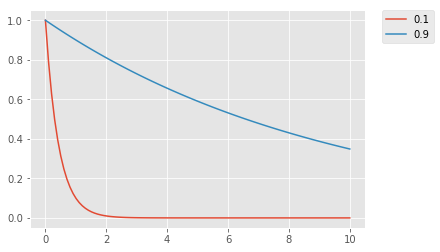

In [12]:
x = np.linspace(0, 10, num=100)

plt.plot(x, np.power(0.1,x), label="0.1")
plt.plot(x, np.power(0.9,x), label="0.9")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Exercícios 08, 09 e 10

In [13]:
Image(url= "ex08.png")

In [14]:
Image(url= "ex09.png")

Considerando 


$A^\prime = \begin{bmatrix}
 2 & -1 &    &    & \\ 
-1 &  2 & -1 &    & \\ 
   & -1 &  2 & -1 & \\ 
   &    & \ddots &  \ddots   & \ddots \\ 
   &    & -1 &  2   & -1
\end{bmatrix}$

$R_\omega = I -\frac{\omega}{2} A^\prime$


Os autovetores de $A^\prime$ são $w_{k,j} = sen(\frac{k\pi i}{N})$, pois:

$(A^\prime w_k)_{j} =  2 sen(\frac{k\pi i}{N}) - sen(\frac{k\pi (i-1)}{N}) - sen(\frac{k\pi (i+1)}{N})$

$2 sen(\frac{k\pi i}{N}) - sen(\frac{k\pi (i-1)}{N}) - sen(\frac{k\pi (i+1)}{N}) 
=
sen(\frac{k\pi i}{N}) - sen(\frac{k\pi (i-1)}{N}) + sen(\frac{k\pi i}{N} - sen(\frac{k\pi (i+1)}{N}) )$


$ = 2sen(\frac{k\pi}{2N})cos(\frac{k\pi(2i-1)}{2N}) + 2sen(-\frac{k\pi}{2N})cos(\frac{k\pi(2i+1)}{2N})$

$ = 2sen(\frac{k\pi}{2N})cos(\frac{k\pi(2i-1)}{2N}) + 2sen(-\frac{k\pi}{2N})cos(\frac{k\pi(2i+1)}{2N})$

$ = 2sen(\frac{k\pi}{2N})[cos(\frac{k\pi(2i-1)}{2N}) - cos(\frac{k\pi(2i+1)}{2N})]$

$ = 2sen(\frac{k\pi}{2N}) * [-2 sen(\frac{k\pi4i)}{4N})sen(\frac{-2k\pi}{4N})]$

$ = 2sen(\frac{k\pi}{2N}) * [2 sen(\frac{k\pi i)}{N})sen(\frac{k\pi}{2N})]$

$ = 4sen^2(\frac{k\pi}{2N}) sen(\frac{k\pi i}{N})$

$ (A^\prime w_k)_{j}  = 4sen^2(\frac{k\pi}{2N}) w_{k,j}$

Além disso, os autovalores são $\lambda_k= 4sen^2(\frac{k\pi}{2N})$. Como $1\le k < N$ então $\frac{\pi}{2N} \le \frac{k\pi}{2N} < \frac{\pi}{2} $ e a função seno é injetora nesse intervalo como mostra a gráfico.

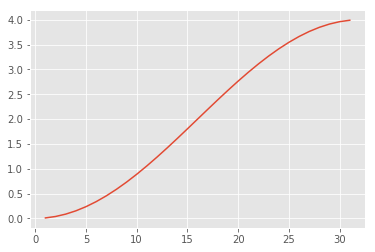

In [15]:
N = 32
x = [k*np.pi/(2*N) for k in range(1, N)]

plt.plot(range(1, N), 4*np.power(np.sin(x),2))



(-1.1, 1.1)

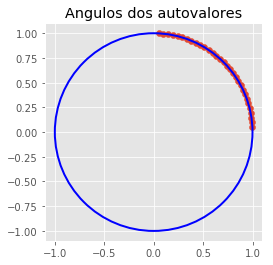

In [16]:
ax = plt.subplot(111)
circle = plt.Circle((0, 0), 1, color='b', fill=False, lw=2)
ax.add_artist(circle)

ax.set_title("Angulos dos autovalores")
ax.scatter(np.cos(x), np.sin(x))
ax.set_aspect('equal')
ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])

In [17]:
Image(url= "ex10.png")


Os autovetores de $R_w$ são os mesmos de $A^\prime$, pois, seja $v$ um autovalor de $A^\prime$ e $\lambda$ seu autovalor correspondente

$R_wv = (I -\frac{\omega}{2} A^\prime)v$

$R_wv = (v -\frac{\omega}{2} A^\prime v) = v -\frac{\omega}{2} \lambda v = (1 - \frac{\omega}{2}\lambda)v $

E os autovalores são associados da seguinte maneira:

$\lambda(R_w) = (1 - \frac{\omega}{2}\lambda(A^\prime))$

In [18]:
Image(url= "ex11.png")

O período é o menor $\Delta j$ tal que:

$w_{k,j+ \Delta j} = w_{k,j}$

$w_{k,j+ \Delta j} = sen(\frac{(j+\Delta j)k\pi}{n}) = sen(\frac{jk\pi}{n} + \frac{\Delta jk\pi}{n})$

Então é necessário que:

$ \frac{\Delta jk\pi}{n} =  2\pi$

$ \Delta j =  \frac{2n}{k}$

Como cada $\Delta j$ tem tamanho $h = 1/n$

$ l = \Delta j h =  \frac{2n}{k} \times  \frac{1}{n} = \frac{2}{k}$


Para $ l = 8h $

$  \frac{2}{k} = 8h \rightarrow k = \frac{1}{4h}$


Para $ l = \frac{1}{4} $

$  \frac{2}{k} = \frac{1}{4} \rightarrow k = 8$



In [23]:
Image(url= "ex12")

In [20]:
Image(url= "ex13.png")

Os autovalores são dados pela seguinte equação:

$\lambda(R_w) = 1 - \frac{\omega}{2}\lambda(A^\prime)$

Logo,

$\lambda(R_w) = 1 - \frac{\omega}{2} 4sen^2(\frac{k\pi}{2N}) = 1 - 2 \omega sen^2(\frac{k\pi}{2N})$



O Smoothing Factor ($SF$) é definido como:

$SF = max \{|1 - 2 \omega sen^2(\frac{k\pi}{2N})| |  \frac{N}{2} \le k < N  \}$

Como $sen^2(\frac{k\pi}{2N})$ é contínua e estritamente crescente para $ \frac{N}{2} \le k < N $ então $1 - 2 \omega sen^2(\frac{k\pi}{2N})$ é estritamente decrescente nesse intervalo e, portanto, o máximo de $1 - 2 \omega sen^2(\frac{k\pi}{2N})$ deve estar na extremidades.

Assim, para $k = N/2$

$|1 - 2 \omega sen^2(\frac{k\pi}{2N})| = |1 - 2 \frac{2}{3} sen^2( \frac{N}{2} \frac{\pi}{2N})| $

$|1 - 2 \omega sen^2(\frac{k\pi}{2N})| = |1 -  \frac{4}{3} sen^2( \frac{\pi}{4}) |$

$|1 - 2 \omega sen^2(\frac{k\pi}{2N})| = |1 -  \frac{4}{3} \frac{1}{2} |$

$|1 - 2 \omega sen^2(\frac{k\pi}{2N})| = |1 -  \frac{2}{3} | = \frac{1}{3}$

E para $k = N$

$|1 - 2 \omega sen^2(\frac{k\pi}{2N})| = |1 - 2 \frac{2}{3} sen^2( N \frac{\pi}{2N})| $

$|1 - 2 \omega sen^2(\frac{k\pi}{2N})| = |1 -  \frac{4}{3} sen^2( \frac{\pi}{2}) |$

$|1 - 2 \omega sen^2(\frac{k\pi}{2N})| = |1 -  \frac{4}{3} 1 |$

$|1 - 2 \omega sen^2(\frac{k\pi}{2N})| = |1 -  \frac{4}{3} | = |-\frac{1}{3}| = \frac{1}{3} $


Logo, o $SF = \frac{1}{3}.$



